# Exploration

In [ ]:
import pandas as pd

# Load in the Dataset
df = pd.read_csv('/work/Merged_Netflix_Data.csv')

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame
df.set_index('Date', inplace=True)

# Now I can resample
weekly_aggregates = df.resample('W').agg({'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'sum'})
monthly_aggregates = df.resample('M').agg({'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'sum'})

# Display the first few rows of the aggregates to check
print(weekly_aggregates.head())
print(monthly_aggregates.head())


                Open      High       Low     Close     Volume
Date                                                         
2002-05-26  1.185357  1.233929  1.171428  1.203215  115894800
2002-06-02  1.141071  1.145714  1.096429  1.102143   31985800
2002-06-09  1.130857  1.171714  1.109286  1.138857   11463200
2002-06-16  1.126286  1.150714  1.082429  1.094429   10638600
2002-06-23  0.963429  1.004857  0.910143  0.944143   29603000
                Open      High       Low     Close     Volume
Date                                                         
2002-05-31  1.155833  1.175119  1.121429  1.135834  147880600
2002-06-30  1.050214  1.084321  1.011929  1.038071   74190200
2002-07-31  1.119578  1.154675  1.066429  1.110000   73610600
2002-08-31  0.874805  0.902175  0.832890  0.870974   64883000
2002-09-30  0.843179  0.858679  0.812786  0.828071   55749400


In [ ]:
# Summary statistics for all days
summary_all_days = df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

# For days with content releases
summary_release_days = df[df['Premiere_Flag'] == 1][['Open', 'High', 'Low', 'Close', 'Volume']].describe()

# For days without content releases
summary_non_release_days = df[df['Premiere_Flag'] == 0][['Open', 'High', 'Low', 'Close', 'Volume']].describe()

summary_all_days  # Print summary statistics for all days

,Open,High,Low,Close,Volume
count,4701.000000,4701.000000,4701.000000,4701.000000,4.701000e+03
mean,97.837966,99.343282,96.287142,97.867024,1.708878e+07
std,149.983326,152.120333,147.722752,149.989696,1.960352e+07
min,0.377857,0.410714,0.346429,0.372857,2.856000e+05
25%,3.842857,3.912857,3.751429,3.841429,6.432300e+06
50%,16.750000,17.125713,16.325714,16.771429,1.099770e+07
75%,114.449997,116.419998,111.699997,114.379997,2.061710e+07
max,689.059998,689.969971,677.270020,688.289978,3.234140e+08


In [ ]:
# Print summary for days with content releases
summary_release_days 

,Open,High,Low,Close,Volume
count,2930.000000,2930.000000,2930.000000,2930.000000,2.930000e+03
mean,366.961628,372.539611,360.531031,366.416469,8.385607e+06
std,139.344114,140.391450,138.056748,139.398298,7.959622e+06
min,17.602858,18.657143,17.407143,18.464287,1.287200e+06
25%,280.260010,282.500000,266.000000,270.750000,4.457800e+06
50%,342.309998,350.284988,336.455002,339.850006,6.347400e+06
75%,493.929993,501.230011,486.589996,492.989990,9.960500e+06
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08


In [ ]:
# Print summary for days without content releases
summary_non_release_days 

,Open,High,Low,Close,Volume
count,4701.000000,4701.000000,4701.000000,4701.000000,4.701000e+03
mean,97.837966,99.343282,96.287142,97.867024,1.708878e+07
std,149.983326,152.120333,147.722752,149.989696,1.960352e+07
min,0.377857,0.410714,0.346429,0.372857,2.856000e+05
25%,3.842857,3.912857,3.751429,3.841429,6.432300e+06
50%,16.750000,17.125713,16.325714,16.771429,1.099770e+07
75%,114.449997,116.419998,111.699997,114.379997,2.061710e+07
max,689.059998,689.969971,677.270020,688.289978,3.234140e+08


# Visualizations

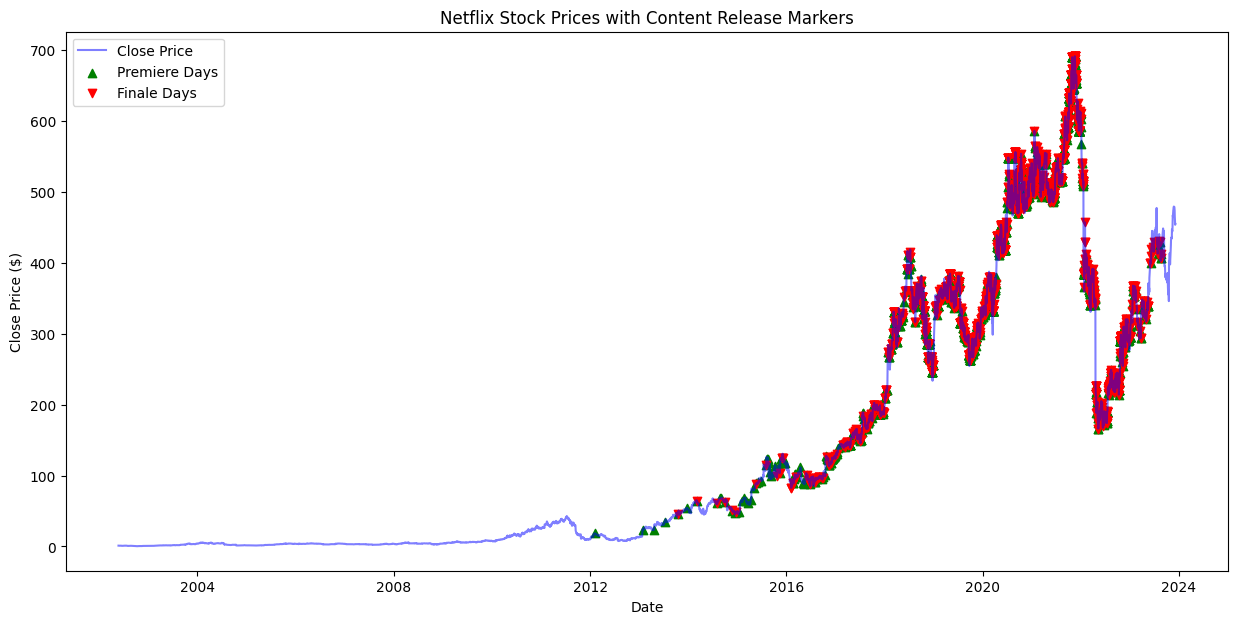

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting stock 'Close' prices over time
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.5)

# Marking days with premieres
plt.scatter(df[df['Premiere_Flag'] == 1].index, df[df['Premiere_Flag'] == 1]['Close'], color='green', label='Premiere Days', marker='^')

# Marking days with finales
plt.scatter(df[df['Finale_Flag'] == 1].index, df[df['Finale_Flag'] == 1]['Close'], color='red', label='Finale Days', marker='v')

plt.title('Netflix Stock Prices with Content Release Markers')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()


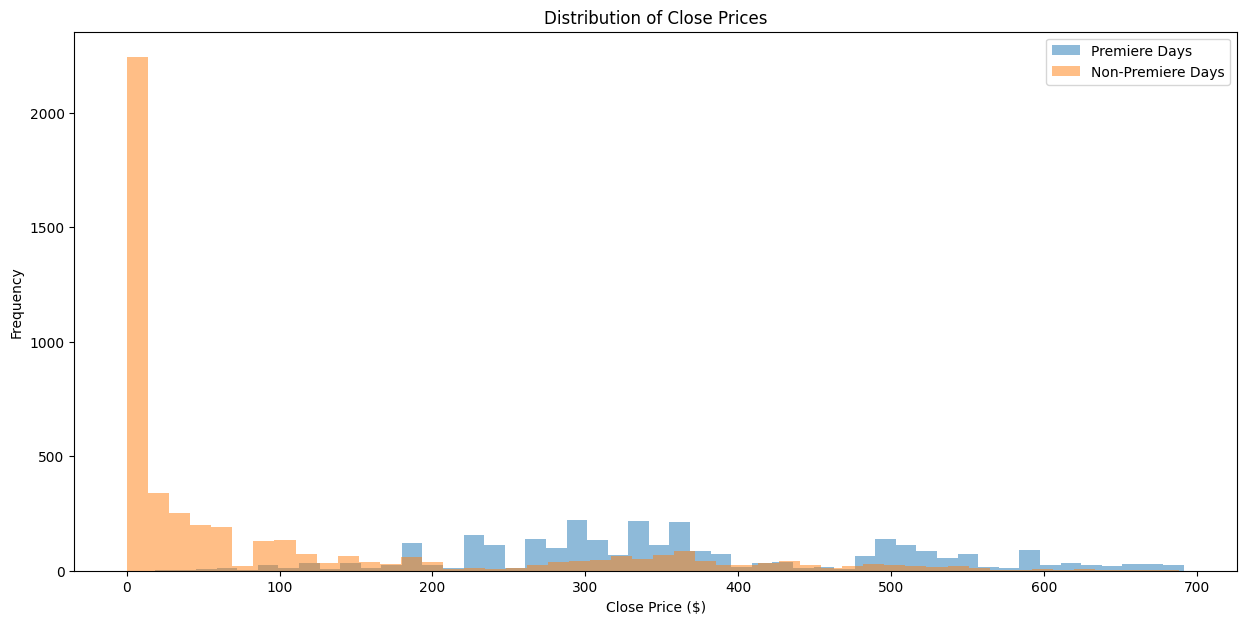

In [ ]:
# Histogram of Close prices on premiere days vs. non-premiere days
plt.figure(figsize=(15, 7))
plt.hist(df[df['Premiere_Flag'] == 1]['Close'], bins=50, alpha=0.5, label='Premiere Days')
plt.hist(df[df['Premiere_Flag'] == 0]['Close'], bins=50, alpha=0.5, label='Non-Premiere Days')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


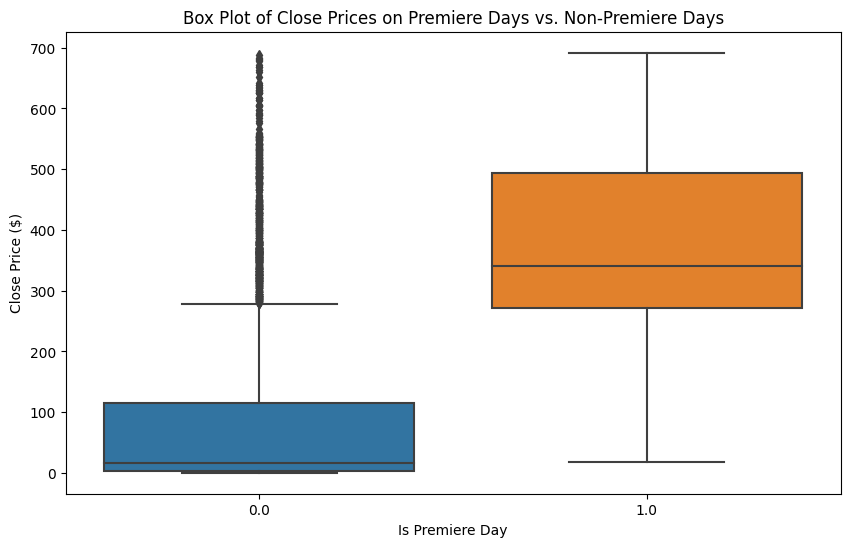

In [ ]:
import seaborn as sns

# Boxplot of Close prices on premiere days vs. non-premiere days
plt.figure(figsize=(10, 6))
sns.boxplot(x='Premiere_Flag', y='Close', data=df)
plt.title('Box Plot of Close Prices on Premiere Days vs. Non-Premiere Days')
plt.xlabel('Is Premiere Day')
plt.ylabel('Close Price ($)')
plt.show()


# Correlation Analysis

In [ ]:
# Calculate the correlation coefficient for premiere days and closing prices
premiere_corr = df['Premiere_Flag'].corr(df['Close'])

# Calculate the correlation coefficient for finale days and closing prices
finale_corr = df['Finale_Flag'].corr(df['Close'])

print(f"Correlation between premiere days and closing prices: {premiere_corr}")
print(f"Correlation between finale days and closing prices: {finale_corr}")


Correlation between premiere days and closing prices: 0.6667421251969976
Correlation between finale days and closing prices: 0.684535980732846


In [ ]:
# Define a window size (e.g., 5 days)
window_size = 5

# Calculate the percentage change in closing price for the defined window around premiere days
df['Close_Percent_Change_Premiere'] = df['Close'].pct_change(periods=window_size).shift(-window_size)

# Calculate the correlation for the percentage change in price around premiere days
premiere_window_corr = df['Premiere_Flag'].corr(df['Close_Percent_Change_Premiere'])

print(f"Correlation between premiere days and percentage change in closing price over a {window_size}-day window: {premiere_window_corr}")

Correlation between premiere days and percentage change in closing price over a 5-day window: -0.05621793471203738


# Statistical Analysis

In [ ]:
# Installing the yfinance package
!pip install yfinance  

import yfinance as yf

# Download S&P 500 data from Yahoo Finance
sp500 = yf.download('^GSPC', start='2002-05-23', end='2023-12-05')

# Calculate daily returns
sp500['market_returns'] = sp500['Close'].pct_change()

# The DataFrame `sp500` now contains the market index data


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Merge the S&P 500 returns into the main DataFrame
# This will align the market returns with the trading days of Netflix
df = df.merge(sp500[['market_returns']], left_index=True, right_index=True, how='left')

# Now, calculate expected and abnormal returns around each event
for index, row in df.iterrows():
    # Define the event window
    window_start = index - pd.Timedelta(days=event_window/2)
    window_end = index + pd.Timedelta(days=event_window/2)
    
    # Get the date range for the event window
    # This will only include dates that actually exist in the DataFrame index
    event_period = df.index[(df.index >= window_start) & (df.index <= window_end)]
    
    # Calculate expected returns using the market model parameters
    expected_returns = model.params['Intercept'] + model.params['market_returns'] * df.loc[event_period, 'market_returns']
    
    # Calculate abnormal returns
    abnormal_returns = df.loc[event_period, 'netflix_returns'] - expected_returns
    
    # Assign the calculated expected and abnormal returns back to the DataFrame
    df.loc[event_period, 'expected_returns'] = expected_returns
    df.loc[event_period, 'abnormal_returns'] = abnormal_returns

# Calculate the cumulative abnormal returns (CAR)
# Here we sum the abnormal returns within the event window for each event
df['CAR'] = df['abnormal_returns'].rolling(window=event_window, min_periods=1).sum()

T-statistic: 1.1272759320565728, P-value: 0.25966129300402724


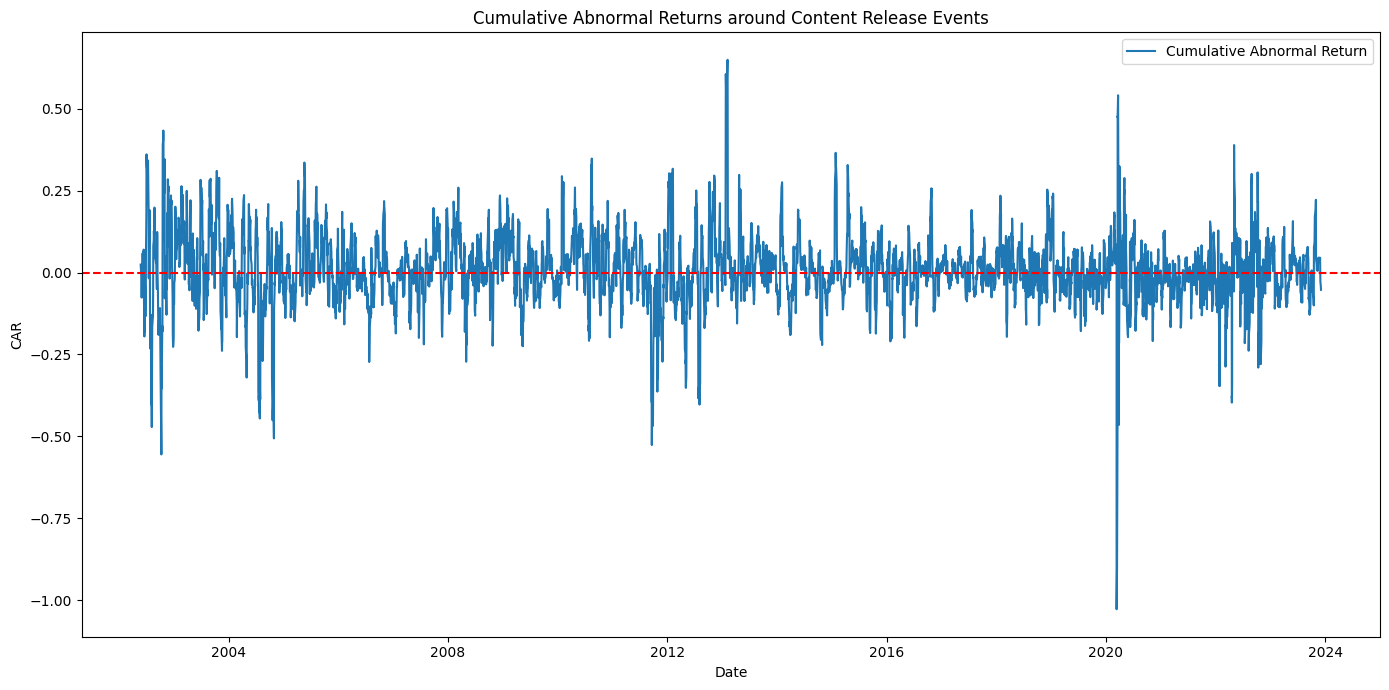

In [ ]:
from scipy import stats

# Perform a t-test on the abnormal returns to see if they are significantly different from zero
t_stat, p_value = stats.ttest_1samp(df['abnormal_returns'].dropna(), 0)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Visualize the Cumulative Abnormal Returns (CAR)
plt.figure(figsize=(14, 7))
plt.plot(df['CAR'], label='Cumulative Abnormal Return')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero for reference
plt.title('Cumulative Abnormal Returns around Content Release Events')
plt.xlabel('Date')
plt.ylabel('CAR')
plt.legend()
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a583ccc-f5fd-4c63-89d0-e5b001224f72' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>